### 중소기업 통계 데이터 활용 정책 아이디어 공모전_02. 군집화_중소기업경기전망조사_제조업

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
EOS_fac = pd.read_csv('EOS_fac.csv')
EOS_fac

C:\Users\juyeo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,WT,X1,X2,X3,X16,X17,X17_1,X20,X21,X30,...,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,4395.72,11,2,10,1,1,2,2,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
1,4395.72,11,3,10,1,2,2,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
2,6416.74,31,5,10,2,2,2,4,3,4.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
3,4395.72,31,3,10,1,1,2,3,3,3.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,202101.xlsx
4,4395.72,31,2,10,1,1,2,2,2,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,1024.57,38,1,33,1,1,2,3,3,3.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202112.xlsx
16637,1024.57,39,1,33,1,1,2,2,2,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202112.xlsx
16638,1024.57,21,1,33,1,2,2,2,1,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202112.xlsx
16639,1024.57,33,3,33,1,2,2,2,2,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202112.xlsx


#### 01) 결측값 전처리
+ X55번 이후의 결측값 확인    
    -> 응답 항목이기 때문에 0으로 전처리

In [3]:
EOS_fac.isnull().sum().tail()

X68     14592
X69     14814
X70     15936
X71     16435
date        0
dtype: int64

In [4]:
EOS_fac = EOS_fac.fillna(0)
EOS_fac.isnull().sum().tail()

X68     0
X69     0
X70     0
X71     0
date    0
dtype: int64

In [5]:
date = []
for i in EOS_fac['date']:
    date.append(i.split('.')[0])
    
EOS_fac['date'] = date

In [6]:
EOS_fac

,WT,X1,X2,X3,X16,X17,X17_1,X20,X21,X30,...,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,4395.72,11,2,10,1,1,2,2,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101
1,4395.72,11,3,10,1,2,2,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101
2,6416.74,31,5,10,2,2,2,4,3,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101
3,4395.72,31,3,10,1,1,2,3,3,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,202101
4,4395.72,31,2,10,1,1,2,2,2,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,1024.57,38,1,33,1,1,2,3,3,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112
16637,1024.57,39,1,33,1,1,2,2,2,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112
16638,1024.57,21,1,33,1,2,2,2,1,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112
16639,1024.57,33,3,33,1,2,2,2,2,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112


In [7]:
EOS_fac.dtypes.head()

WT     float64
X1       int64
X2       int64
X3       int64
X16      int64
dtype: object

In [8]:
EOS_fac.loc[EOS_fac['X48'] == '7o']
EOS_fac['X48'][52] = 70

C:\Users\juyeo\AppData\Local\Temp/ipykernel_3684/2171027366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EOS_fac['X48'][52] = 70


In [9]:
EOS_fac = EOS_fac.astype('float')
EOS_fac.dtypes

WT       float64
X1       float64
X2       float64
X3       float64
X16      float64
X17      float64
X17_1    float64
X20      float64
X21      float64
X30      float64
X31      float64
X32      float64
X33      float64
X34      float64
X35      float64
X36      float64
X37      float64
X38      float64
X39      float64
X40      float64
X41      float64
X42      float64
X43      float64
X44      float64
X45      float64
X46      float64
X47      float64
X48      float64
X49      float64
X55      float64
X56      float64
X57      float64
X58      float64
X59      float64
X60      float64
X61      float64
X62      float64
X63      float64
X64      float64
X65      float64
X66      float64
X67      float64
X68      float64
X69      float64
X70      float64
X71      float64
date     float64
dtype: object

### 2. 차원 축소 (PCA)

In [10]:
def data_scale_pca(data):
    from sklearn.preprocessing import StandardScaler
    S_Scaler = StandardScaler()

    from sklearn.preprocessing import MinMaxScaler
    M_Scaler = MinMaxScaler()

    from sklearn.decomposition import PCA
    pca = PCA(n_components=0.95)
    
    #(1) 스케일링 미적용
    data_pca = pca.fit_transform(data)
    
    print('---------------')
    print('Scaler : X')
    print('차원 : ',data_pca.shape)
    print('설명 가능 분산 비율 : ',pca.explained_variance_ratio_)
    print('설명 가능 분산: ',pca.explained_variance_)
    
    
    #(2) 스케일링 적용 (standard)
    data_S = S_Scaler.fit_transform(data)
    data_S_P = pca.fit_transform(data_S)
    
    print('---------------')
    print('Scaler : Standard')
    print('차원 : ',data_S_P.shape)
    print('설명 가능 분산 비율 : ',pca.explained_variance_ratio_)
    print('설명 가능 분산: ',pca.explained_variance_)

    #(3) 스케일링 적용 (MinMax)
    data_M = M_Scaler.fit_transform(data)
    data_M_P = pca.fit_transform(data_M)

    print('---------------')
    print('Scaler : MinMax')
    print('차원 : ',data_M_P.shape)
    print('설명 가능 분산 비율 : ',pca.explained_variance_ratio_)
    print('설명 가능 분산: ',pca.explained_variance_)

#### 01) 전체 데이터 PCA 적용
(1) 스케일링 미적용    
(2) 스케일링 적용 (standard)    
(3) 스케일링 적용 (minmax)    

In [11]:
data_scale_pca(EOS_fac)

---------------
Scaler : X
차원 :  (16641, 1)
설명 가능 분산 비율 :  [0.9999069]
설명 가능 분산:  [9523733.84947754]
---------------
Scaler : Standard
차원 :  (16641, 33)
설명 가능 분산 비율 :  [0.18678354 0.0767165  0.0737035  0.04460275 0.03599672 0.03332792
 0.02952701 0.02850867 0.02559048 0.02462205 0.02369984 0.02282826
 0.02275924 0.02192176 0.02107656 0.0207414  0.02021933 0.01966243
 0.01864904 0.01795799 0.01746878 0.01729279 0.01656673 0.01628366
 0.01553802 0.01532745 0.01492851 0.01462069 0.0139858  0.0137465
 0.01245184 0.01148359 0.01013214]
설명 가능 분산:  [8.77935387 3.60589204 3.46427247 2.09645505 1.69194758 1.56650641
 1.38785271 1.33998797 1.20282466 1.15730596 1.11395919 1.07299259
 1.06974867 1.03038479 0.99065771 0.97490443 0.95036567 0.92418998
 0.87655762 0.84407639 0.82108198 0.81281002 0.77868326 0.7653781
 0.73033086 0.72043335 0.70168212 0.68721391 0.65737215 0.64612443
 0.5852716  0.53976132 0.4762392 ]
---------------
Scaler : MinMax
차원 :  (16641, 27)
설명 가능 분산 비율 :  [0.13119434 0.0880

#### 02) 기업 경영상 애로사항 데이터+date PCA 적용
(1) 스케일링 미적용    
(2) 스케일링 적용 (standard)    
(3) 스케일링 적용 (minmax)    

In [22]:
EOS_fac_com_date = EOS_fac[['X55','X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65','X66', 'X67', 'X68', 'X69', 'X70', 'X71','date']]
EOS_fac_com_date

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,202101.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16637,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16638,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16639,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0


In [13]:
data_scale_pca(EOS_fac_com_date)

---------------
Scaler : X
차원 :  (16641, 10)
설명 가능 분산 비율 :  [0.83121171 0.02399758 0.02035478 0.01643361 0.01408211 0.01310603
 0.01125674 0.01047951 0.00905805 0.00877989]
설명 가능 분산:  [11.90939349  0.34383139  0.29163824  0.23545661  0.20176488  0.18777993
  0.16128375  0.15014784  0.12978147  0.12579604]
---------------
Scaler : Standard
차원 :  (16641, 17)
설명 가능 분산 비율 :  [0.11009751 0.08544466 0.07189172 0.0706396  0.06456595 0.05650067
 0.05547485 0.05440521 0.05291747 0.0469584  0.04592196 0.04422061
 0.04333757 0.04282037 0.03989903 0.03954781 0.03853838]
설명 가능 분산:  [1.9818742  1.53809629 1.2941287  1.27158921 1.16225691 1.01707312
 0.99860737 0.97935259 0.95257176 0.84530204 0.82664491 0.79601875
 0.78012312 0.77081292 0.71822572 0.71190328 0.69373261]
---------------
Scaler : MinMax
차원 :  (16641, 15)
설명 가능 분산 비율 :  [0.13907385 0.11535262 0.09625021 0.07979036 0.07453033 0.06386757
 0.05962909 0.05142907 0.05038391 0.0477901  0.04183328 0.04094938
 0.03555719 0.03280636 0.03091348]

#### 03) 기업 경영상 애로사항 데이터 PCA 적용
(1) 스케일링 미적용    
(2) 스케일링 적용 (standard)    
(3) 스케일링 적용 (minmax)    

In [10]:
EOS_fac_com = EOS_fac[['X55','X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65','X66', 'X67', 'X68', 'X69', 'X70', 'X71']]
EOS_fac_com

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16637,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16638,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16639,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data_scale_pca(EOS_fac_com)

---------------
Scaler : X
차원 :  (16641, 14)
설명 가능 분산 비율 :  [0.14376111 0.12000501 0.09888076 0.08301219 0.07740889 0.06639404
 0.06187723 0.05341598 0.05195123 0.04966852 0.04329643 0.04212581
 0.03442589 0.03227181]
설명 가능 분산:  [0.34944983 0.29170427 0.24035613 0.20178332 0.188163   0.16138847
 0.15040915 0.12984182 0.12628136 0.12073261 0.10524354 0.10239805
 0.08368133 0.07844527]
---------------
Scaler : Standard
차원 :  (16641, 16)
설명 가능 분산 비율 :  [0.11564294 0.08929423 0.07536227 0.07306595 0.06739077 0.05945308
 0.05857771 0.05632317 0.05042885 0.04949542 0.04743691 0.04593489
 0.04560338 0.04299309 0.04200911 0.04110071]
설명 가능 분산:  [1.9660481  1.51809318 1.28123565 1.24219587 1.14571195 1.01076309
 0.99588087 0.95755141 0.85734192 0.84147273 0.80647593 0.78094013
 0.775304   0.73092646 0.71419775 0.69875403]
---------------
Scaler : MinMax
차원 :  (16641, 14)
설명 가능 분산 비율 :  [0.14376111 0.12000501 0.09888076 0.08301219 0.07740889 0.06639404
 0.06187723 0.05341598 0.05195123 0.0496685

-> 전부 다 범주형인데 PCA가 맞나?

+ https://dschloe.github.io/python/python_edu/05_statistics/chapter_5_2_positioning_analysis_2/
+ https://www.quora.com/How-do-we-perform-PCA-of-categorical-and-continuous-data-together-in-Python
+ https://github.com/MaxHalford/prince#multiple-correspondence-analysis-mca

In [16]:
### K-MODES

In [23]:
EOS_fac_com.astype('object')
EOS_fac_com_date.astype('object')

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,202101.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16637,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16638,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0
16639,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202112.0


In [57]:
#엘보우 포인트 찾기
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,20)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(EOS_fac_com)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 56609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 934, cost: 52099.0
Run 1, iteration: 2/100, moves: 152, cost: 52099.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1655, cost: 49471.0
Run 1, iteration: 2/100, moves: 133, cost: 49471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2708, cost: 44543.0
Run 1, iteration: 2/100, moves: 2078, cost: 44299.0
Run 1, iteration: 3/100, moves: 571, cost: 44267.0
Run 1, iteration: 4/100, moves: 78, cost: 44267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2379, cost: 44022.0
Run 1, iteration: 2/100, moves: 1880, cost: 42469.0
Run 1, iteration: 3/100, moves: 1352,

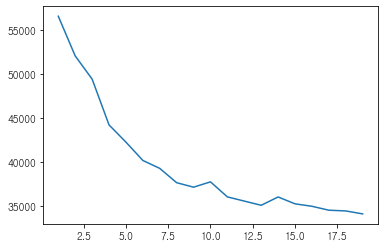

In [58]:
y = np.array([i for i in range(1,20,1)])
plt.plot(y,cost)

In [18]:
def kmode_cluster(ori,data,n_clusters):
    from kmodes.kmodes import KModes
    
    km_cao = KModes(n_clusters=n_clusters, init = "Cao", n_init = 1, verbose=1)
    fitClusters_cao = km_cao.fit_predict(data)
    
    data_cp = data.copy()
    data_cp['cluster'] = fitClusters_cao
    data_cp['X3'] = ori['X3']
    data_cp['date'] = ori['date']

    clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
    clusterCentroidsDf.columns = data.columns
    return data_cp, clusterCentroidsDf

In [19]:
cluster_7 = kmode_cluster(EOS_fac,EOS_fac_com,7)
cluster_7

Init: initializing centroids
Init: initializing clusters
Starting iterations...


KeyboardInterrupt: 

n_cluster = 7

+ 영향이 적은 요인 : X63,X68,X70,X71
    + (기술경쟁력 약화, 계절적 비수기,고금리, 모기업 불공정거래)
+ 영향이 큰 요인(4개 이상) : X55,X61,X65
    + (내수부진, 인건비 상승, 원자재 가격 상승)


+ cluster 0 : X55
    + (내수부진)
+ cluster 1 : X55,X56,X57,X58,X59,X60,X61,X62,X64,X65,X66,X69
    + (내수부진,수출부진,판매대금회수 지연, 자금조달 곤란,업체간 과당경쟁, 인력 확보난, 인건비 상승, 물류비상승 및 운송난, 제품단가하락, 원자재 가격 상승, 원자재 구득난, 환율변동)
+ cluster 2 : X59,X61,X64,X65
    + (업체간 과당경쟁, 인건비 상승, 제품 단가 하락, 우너자재 가격 상승)
+ cluster 3 : X55,X57,X60,X61,X62,X65,X67
    + (내수부진, 판매대금회수 지연, 인력확보난, 인건비상승,물류비 상승 및 운송난, 원자재 가격 상승, 설비노후 및 부족)
+ cluster 4 : X60,X61,X65,X66
    + 인력확보난, 인건비 상승, 원자재 가격 상승, 원자재 구득난
+ cluster 5 : X55,X57,X58,X59,X61,X65
    + (내수부진, 판매대금회수 지연, 자금조달 곤란, 업체간 과당경쟁, 인건비 상승, 원자재 가격 상승)
+ cluster 6 : X61,X62,X65
    + (인건비 상승, 물류비 상승 및 운송난, 원자재 가격 상승)

In [20]:
cluster_5 = kmode_cluster(EOS_fac,EOS_fac_com,5)
cluster_5[1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2379, cost: 44022.0
Run 1, iteration: 2/100, moves: 1880, cost: 42469.0
Run 1, iteration: 3/100, moves: 1352, cost: 42310.0
Run 1, iteration: 4/100, moves: 10, cost: 42310.0


,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


+ 영향이 적은 요인 : X56,X63,X68,X69,X70,X71
    + (수출 부진, 기술경쟁력 약화, 계절적 비수기, 환율 변동, 고금리, 모기업 불공정거래)
+ 영향이 큰 요인 (3개 이상 해당) : X55,X61,X65
    + (내수부진, 인건비 상승, 원자재 가격 상승)


+ cluster 0 : X55 
    + (내수부진)
+ cluster 1 : X55,X57,X58,X59,X61,X62,X64,X65,X66 
    + (내수부진, 판매대금회수 지연, 인건비 상승, 물류비 상승 및 운송난, 제품 단가 하락, 원재료 가격 상승, 원재료 구득난)
+ cluster 2 : X59,X61,X64,X65
    + (업체간 과당경쟁, 인건비 상승, 제품 단가하락, 원자재 가격 상승)
+ cluster 3 : X55,X57,X60,X61,X62,X65,X67
    + (내수부진, 판매대금회수 지연, 인력확보난, 인건비 상승, 물류비 상승 및 운송난, 원자재 가격 상승, 설비노후 및 부족)
+ cluster 4 : X60,X61,X65
    + (인력확보난, 인건비 상승, 원자재 가격 상승)

In [35]:
clustered= cluster_5[0]
clustered

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,cluster,X3,date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.0,202101.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.0,202101.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,10.0,202101.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,10.0,202101.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.0,202101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,33.0,202112.0
16637,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,33.0,202112.0
16638,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,33.0,202112.0
16639,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,33.0,202112.0


In [39]:
data = clustered[clustered['cluster']==0].groupby(['X3']).count()

cluster_0 가중치 642.6470588235294


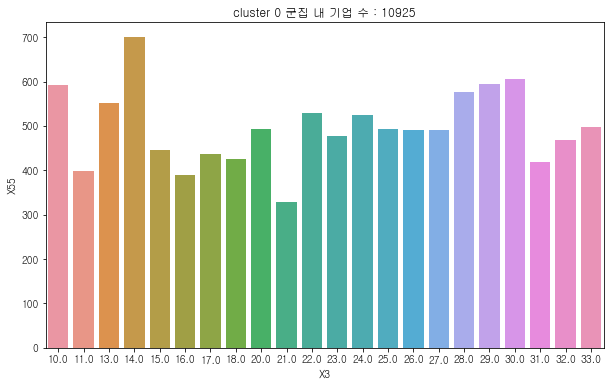

cluster_1 가중치 470.11764705882354


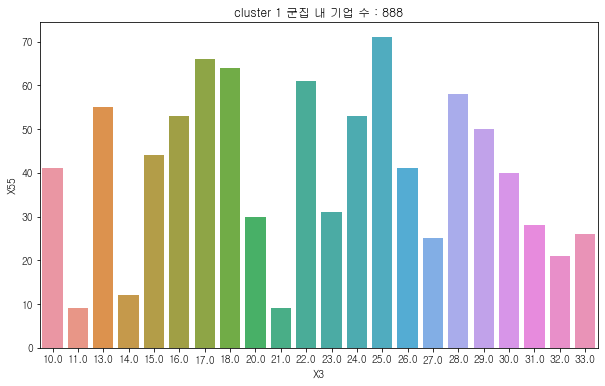

cluster_2 가중치 508.94117647058823


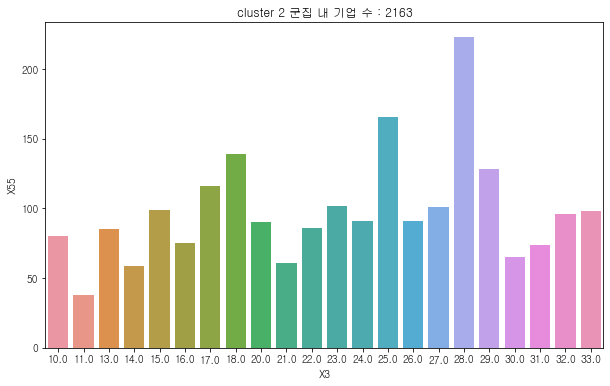

cluster_3 가중치 250.76470588235293


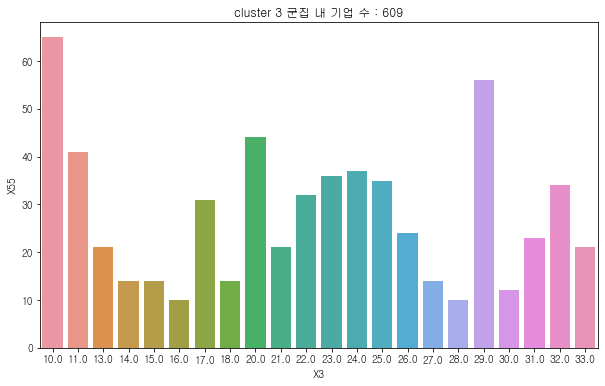

cluster_4 가중치 362.82352941176475


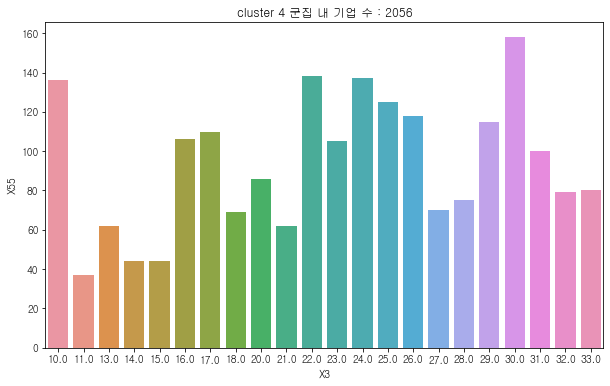

In [56]:
n_clusters = 5
for i in range(n_clusters):
    clustered= cluster_5[0]
    cluster = clustered[clustered['cluster']==i]
    clu = cluster.groupby(['X3']).count()
    print('cluster_%d 가중치'%i,cluster_5[1].T.sum()[i]/17*len(cluster))
    plt.figure(figsize=(10,6))
    sns.barplot(x = clu.index,y='X55',data=clu)
    plt.title('cluster %d 군집 내 기업 수 : %d'%(i,len(cluster)))
    plt.show()

In [24]:
cluster_55 = kmode_cluster(EOS_fac,EOS_fac_com_date,5)
cluster_55[1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3438, cost: 57151.0
Run 1, iteration: 2/100, moves: 1231, cost: 57151.0


,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202103.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,202109.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,202112.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202108.0


In [31]:
dd = EOS_fac_com_date[EOS_fac_com_date['date'] == 202101.0]

In [32]:
cluster_55 = kmode_cluster(EOS_fac,dd,5)
cluster_55[1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 236, cost: 3317.0
Run 1, iteration: 2/100, moves: 122, cost: 3317.0


,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,202101.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202101.0


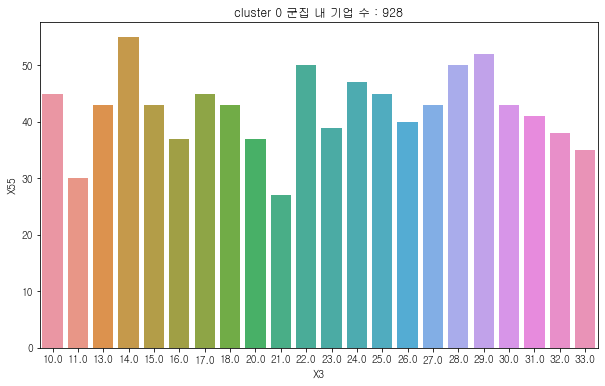

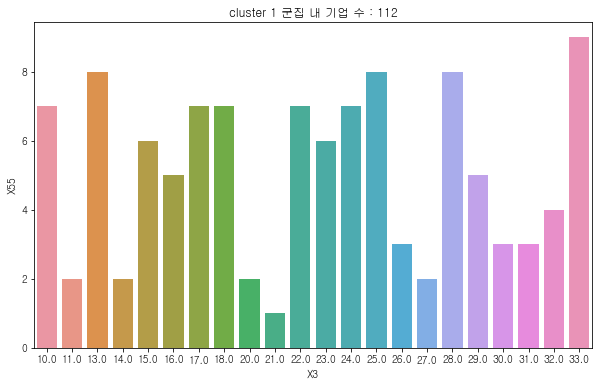

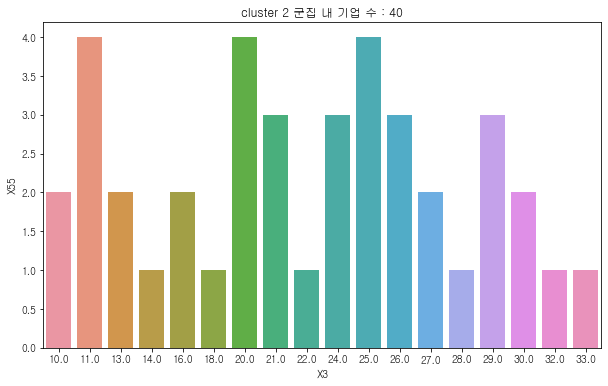

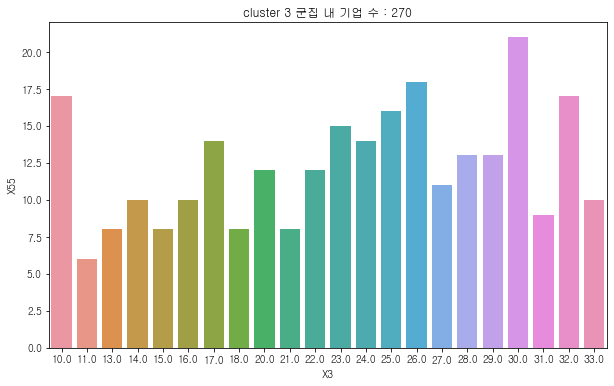

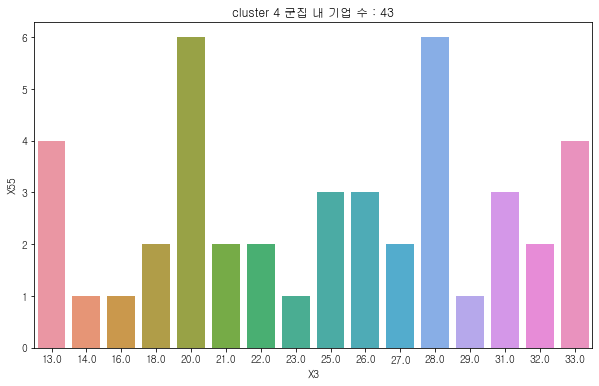

In [34]:
n_clusters = 5
for i in range(n_clusters):
    clustered= cluster_55[0]
    cluster = clustered[clustered['cluster']==i]
    clu = cluster.groupby(['X3']).count()
    plt.figure(figsize=(10,6))
    sns.barplot(x = clu.index,y='X55',data=clu)
    plt.title('cluster %d 군집 내 기업 수 : %d'%(i,len(cluster)))

In [ ]:
print(1/17*928)
print(9/17*888)
print(4/17*2163)
print(7/17*609)
print(3/17*2056)